<a href="https://colab.research.google.com/github/chasubeen/ESAA_8th_YB/blob/Week_4/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0_%EC%BA%90%EA%B8%80%20%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### 구글 드라이브 연결

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **0. Import libraries & 데이터 준비**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
###데이터 준비하기

titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 8기/YB/4주차/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
### 데이터 정보 확인

print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


|Columns|Description|
|-----|----------|
|Passengerid|탑승자 데이터 일련번호|
|survived|생존여부, 0:사망 / 1:생존|
|pclass|티켓의 선실 등급, 1:일등석/2:이등석/3:3등석|
|sex|탑승자 성별|
|name|탑승자 이름|
|Age|탑승자 나이|
|sibsp|같이 탑승한 형제자매 또는 배우자 인원수|
|parch|같이 탑승한 부모님 또는 어린이 인원수|
|ticket|티켓 번호|
|fare|요금|
|cabin|선실 번호|
|embarked|중간 정착 항구, C:Cherbourg/Q:Queenstown/S:Southampton|

- RangeIndex: 891 => DataFrame 인덱스의 범위, 전체 로우 수
  - 891개의 row, 12개의 column으로 구성됨
- 2개의 float64 컬럼, 5개의 int64 컬럼,5개의 object 컬럼
- ```Age```, ```Cabin```, ```Embarked``` 컬럼에 각각 결측치 존재 
  - ```fillna()```를 통해 Null 값을 **평균** 또는 **고정 값**으로 변경
  - Age: 평균 나이, 나머지:'N'

# **1. 데이터 전처리**

In [6]:
### 결측치 처리

titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace = True)
titanic_df['Cabin'].fillna('N',inplace = True)
titanic_df['Embarked'].fillna('N',inplace = True)

print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


- 결측치 처리 완료

In [7]:
print('Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- Cabin 속성의 경우 속성값이 제대로 정리되지 않음
  - 앞 문자만 추출

In [8]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


# **2. EDA(데이터 탐색)**

## **2-1. 성별에 따른 생존율**

In [9]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

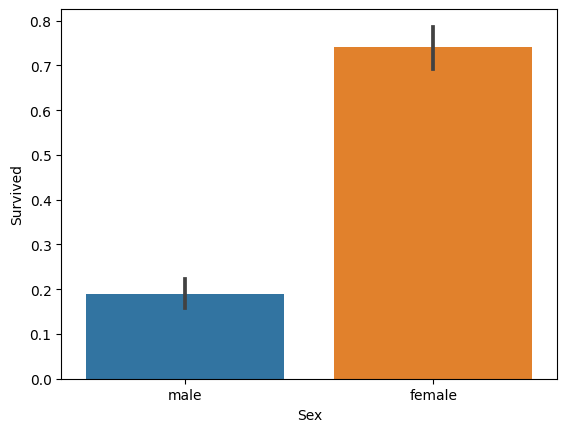

In [10]:
sns.barplot(x = 'Sex', y = 'Survived', data=titanic_df)

- 여자는 314명 중 233명, 약 74.2%가 생존
- 남자는 577명 중 109명, 약 18.8%
> 여자가 남자보다 생존율이 높다.

## **2-2. 객실 등급에 따른 생존율**
- 성별도 함께 고려함

<Axes: xlabel='Pclass', ylabel='Survived'>

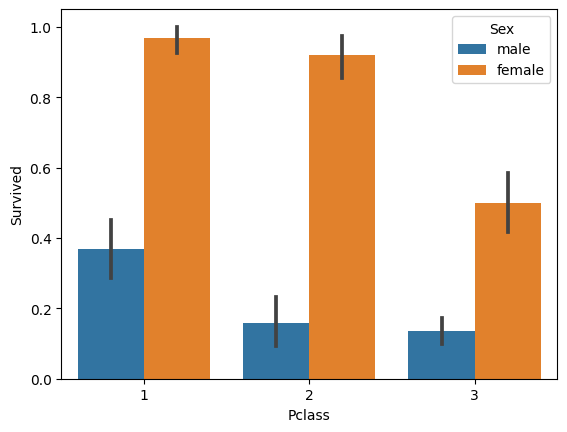

In [11]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

- 여성의 경우 일,이등실 간의 차이는 뚜렷하지 않음
  - 그러나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐
- 남성의 경우 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 많이 높음

## **2-3. 나이에 따른 생존 확률**
- 범위별로 분류해 카테고리 값을 할당

In [12]:
### 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용할 예정
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat

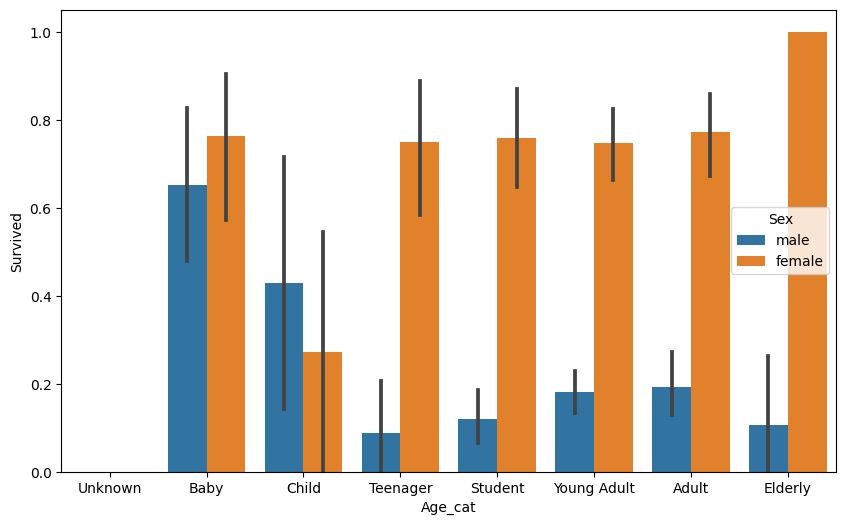

In [13]:
# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize = (10,6))

# X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)

# 시각화 후 불필요한 컬럼 제거
titanic_df.drop('Age_cat', axis=1, inplace=True)

- 여자 Baby의 경우 생존 확률이 높았음
- 여자 Child의 경우 다른 연령대에 비해 생존 확률이 낮았음
- 여자 Elderly의 경우 매우 생존 확률이 높았음
> Sex, Age, PClass 등이 중요하게 생존을 좌우하는 피처임

# **3. 데이터 인코딩**
- 사이킷런의 ```LabelEncoder``` 클래스 활용

In [14]:
from sklearn import preprocessing

### 범주형 변수 인코딩
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

In [15]:
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


- 제대로 변경된 것을 확인할 수 있다.

# **4. 전처리 과정 함수화**
- 지금까지 한 작업들을 함수화
  - 코드 재사용성 확장

In [16]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수를 전체적으로 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [17]:
# 원본 데이터를 재로딩하고, feature데이터 셋과 Label 데이터 셋 추출. 

titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 8기/YB/4주차/titanic_train.csv')

y_titanic_df = titanic_df['Survived'] # y
X_titanic_df= titanic_df.drop('Survived',axis=1) # X

X_titanic_df = transform_features(X_titanic_df) # 데이터 전처리

In [18]:
### 학습 데이터, 테스트 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size = 0.2, random_state = 11)

# **5. 모델링(Modeling)**
- ML 알고리즘들 중 **결정 트리**, **랜덤 포레스트**, **로지스틱 회귀** 활용
- 평가 지표(metric): 정확도(accuracy)
  - ```accuracy_score()``` API 활용

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
# 결정 트리, RandomForest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 3개의 알고리즘 중 **LogisticRegression**이 타 알고리즘에 비해 높은 정확도를 나타내고 있음


# **6. 교차 검증(Cross Validation)**
- ```model_selection.KFold``` 클래스 -- 교차 검증
- ```cross_val_score()``` 클래스 -- 교차 검증
- ```GridSearchCV``` 클래스 -- 하이퍼 파라미터 최적화

- **결정 트리 Classifier**를 이용하여 교차 검증 수행

## **6-1. KFold 클래스 활용**
- 폴드 수: 5

In [21]:
from sklearn.model_selection import KFold

### 교차 검증을 수행하는 함수
def exec_kfold(clf, folds = 5):

    ### KFold 객체 생성
    # 폴드 수만큼 예측 결과(정확도)를 저장하기 위해 리스트 객체 생성
    kfold = KFold(n_splits = folds)
    scores = []
    
    ### KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # 교차 검증 fold별로 학습과 검증 데이터 저장(by 인덱싱)
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습/예측/정확도 계산 
        clf.fit(X_train, y_train) # 학습
        predictions = clf.predict(X_test) # 예측
        accuracy = accuracy_score(y_test, predictions) # 정확도
        scores.append(accuracy)
        
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    ### 5개 fold에서의 정확도의 평균 계산 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

In [22]:
# exec_kfold 호출

exec_kfold(dt_clf, folds = 5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


## **6-2. cross_val_score() 활용**
- StratifiedKFold를 이용해 폴드 세트를 분할
  - 정확도에 약간의 차이가 존재

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


## **6-3. GridSearchCV**
- 의사 결정 트리의 하이퍼 파라미터 최적화

In [24]:
from sklearn.model_selection import GridSearchCV

### 최적화 할 하이퍼 파라미터
# 딕셔너리 형으로 정의(key: 파라미터, value: 설정값)
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters , scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992


In [26]:
# 최적 하이퍼 파라미터로  Estimator 학습/예측/평가 

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


- 하이퍼 파라미터 최적화 후 정확도가 약 8% 이상 증가함


# **7. 전체 프로세스 정리**
**📌 ML 프로젝트의 일반적인 개요**  
1. 문제와 데이터에 대한 이해
  - 문제: 타이타닉 생존자 예측
2. 데이터 정리 및 formatting
  - 결측치 처리
  - 범주형 데이터 인코딩 - Label Encoding
3. EDA(Exploratory Data Analysis)
  - 탐색적 데이터 분석
  - 데이터를 다양한 각도에서 관찰
  - 성별(Sex), 객실 등급(PClass), 나이(Age)에 따른 생존율(Survived) 관찰
4. 기본 모델 학습/예측/평가
  - 결정 트리, 랜덤 포레스트, 로지스틱 회귀 활용
5. 모델 개선
  - 교차 검증: KFold 클래스, cross_val_score() 함수
  - GridSearchCV: 하이퍼 파라미터 최적화
6. 결과 해석 & 최종 평가